In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Final 1.xlsx")

              precision    recall  f1-score   support

           1       0.85      0.67      0.75        42
           2       0.83      0.92      0.88       133
           3       0.69      0.56      0.62        32

    accuracy                           0.82       207
   macro avg       0.79      0.72      0.75       207
weighted avg       0.81      0.82      0.81       207



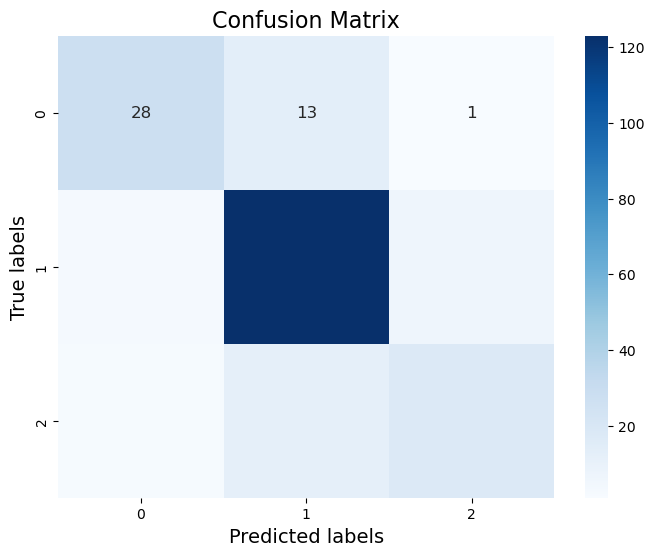

In [4]:
#svm
# Define features (X) and target (y)
X = df.drop(['priority'], axis=1)
y = df['priority']

numeric_features = ['num_of_tickets_from_company_in_last_month', 'num_open_tickets', 'days_open']
categorical_features = ['urgency', 'impact', 'companies']

# Define the preprocessing steps for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the SVM model
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        28
           2       0.90      0.92      0.91        90
           3       0.78      0.70      0.74        20

    accuracy                           0.88       138
   macro avg       0.86      0.84      0.85       138
weighted avg       0.88      0.88      0.88       138



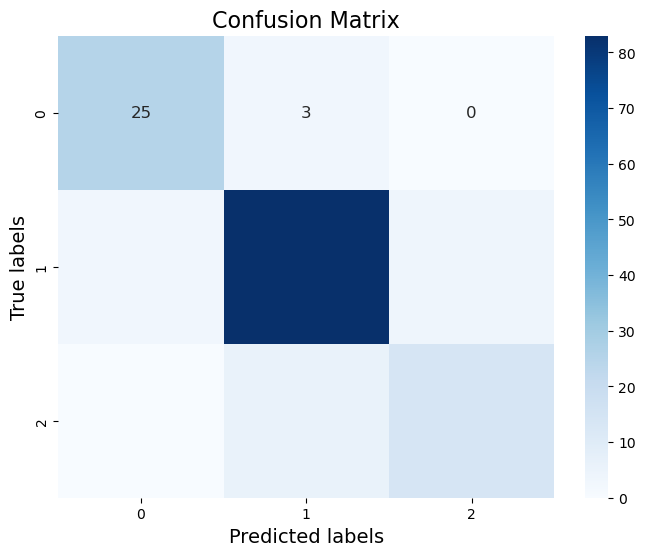

In [5]:
#random forest
# One-hot encode categorical variable 'contact_type'
X = pd.get_dummies(df.drop(['priority'], axis=1))
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        28
           2       0.90      0.92      0.91        90
           3       0.78      0.70      0.74        20

    accuracy                           0.88       138
   macro avg       0.86      0.84      0.85       138
weighted avg       0.88      0.88      0.88       138



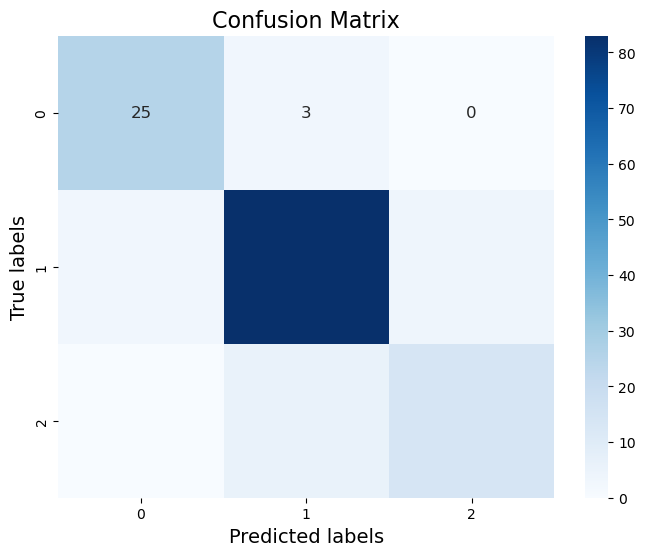

In [6]:
# One-hot encode categorical variable 'contact_type'
X = pd.get_dummies(df.drop(['priority'], axis=1))
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.92      0.84      0.88        90
           2       0.65      0.85      0.74        20

    accuracy                           0.85       138
   macro avg       0.80      0.85      0.82       138
weighted avg       0.86      0.85      0.85       138



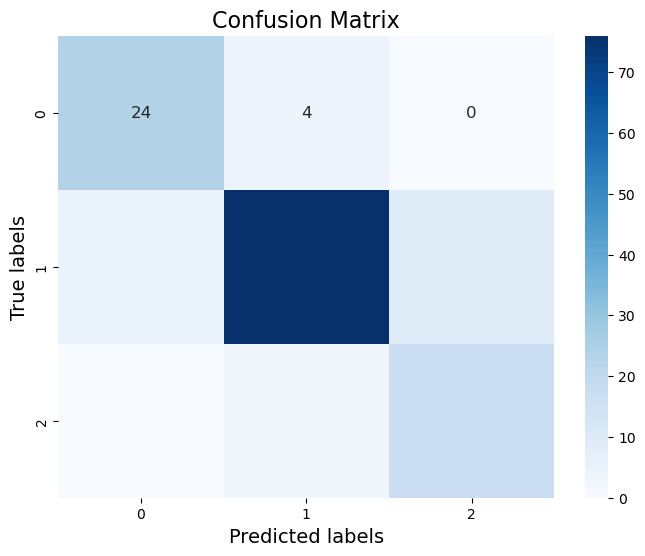

In [7]:
# Gradient Boost
# Define features (X) and target (y)
X = df.drop(['priority'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Map class labels to start from 0
y = y - 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [8]:
# XGB
# Define features (X) and target (y)
X = df.drop(['priority'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Map class labels to start from 0
y = y - 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.91      0.86      0.88        90
           2       0.68      0.75      0.71        20

    accuracy                           0.85       138
   macro avg       0.80      0.83      0.81       138
weighted avg       0.85      0.85      0.85       138



In [9]:
# XGB with random forest
# Define features (X) and target (y)
X = df.drop(['priority'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Map class labels to start from 0
y = y - 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=42)

# Create a voting classifier with both Random Forest and XGBoost classifiers
voting_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('xgb', xgb_classifier)], voting='hard')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("\nPrecision (weighted average):", precision)
print("Recall (weighted average):", recall)
print("F1-score (weighted average):", f1_score)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.91      0.90      0.91        90
           2       0.88      0.70      0.78        20

    accuracy                           0.88       138
   macro avg       0.86      0.84      0.85       138
weighted avg       0.88      0.88      0.88       138


Precision (weighted average): 0.8802225972475118
Recall (weighted average): 0.8768115942028986
F1-score (weighted average): 0.8759197245003797


In [10]:
# Adaboost

X = df.drop(['priority'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("\nPrecision (weighted average):", precision)
print("Recall (weighted average):", recall)
print("F1-score (weighted average):", f1_score)

D:\Softwares\Jupyter\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.81      0.76        52
           2       0.88      0.71      0.79       182
           3       0.49      0.81      0.61        42

    accuracy                           0.75       276
   macro avg       0.70      0.78      0.72       276
weighted avg       0.79      0.75      0.76       276


Precision (weighted average): 0.7895653524589058
Recall (weighted average): 0.7463768115942029
F1-score (weighted average): 0.7558080808080808


In [11]:
# Decision Trees classifier

X = df.drop(['priority'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("\nPrecision (weighted average):", precision)
print("Recall (weighted average):", recall)
print("F1-score (weighted average):", f1_score)

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.81      0.80        52
           2       0.88      0.88      0.88       182
           3       0.70      0.67      0.68        42

    accuracy                           0.84       276
   macro avg       0.79      0.79      0.79       276
weighted avg       0.84      0.84      0.84       276


Precision (weighted average): 0.8359701657574142
Recall (weighted average): 0.8369565217391305
F1-score (weighted average): 0.8363834454306425


In [12]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = df.drop(['priority'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("\nPrecision (weighted average):", precision)
print("Recall (weighted average):", recall)
print("F1-score (weighted average):", f1_score)

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.63      0.73        52
           2       0.83      0.89      0.86       182
           3       0.66      0.64      0.65        42

    accuracy                           0.80       276
   macro avg       0.78      0.72      0.74       276
weighted avg       0.80      0.80      0.80       276


Precision (weighted average): 0.8046634348331061
Recall (weighted average): 0.8043478260869565
F1-score (weighted average): 0.8008680685474819


D:\Softwares\Jupyter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Naive Bayes
# Define features (X) and target (y)
X = df.drop(['priority'], axis=1)  # Exclude ticketId and priority
y = df['priority']

# Map class labels to start from 0
y = y - 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the Naive Bayes classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("\nPrecision (weighted average):", precision)
print("Recall (weighted average):", recall)
print("F1-score (weighted average):", f1_score)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.07      0.13        28
           1       0.72      0.90      0.80        90
           2       0.64      0.70      0.67        20

    accuracy                           0.70       138
   macro avg       0.67      0.56      0.53       138
weighted avg       0.69      0.70      0.64       138


Precision (weighted average): 0.694979809639294
Recall (weighted average): 0.7028985507246377
F1-score (weighted average): 0.6432528743308836


Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.75      0.82        28
           2       0.82      0.92      0.87        90
           3       0.57      0.40      0.47        20

    accuracy                           0.81       138
   macro avg       0.77      0.69      0.72       138
weighted avg       0.80      0.81      0.80       138



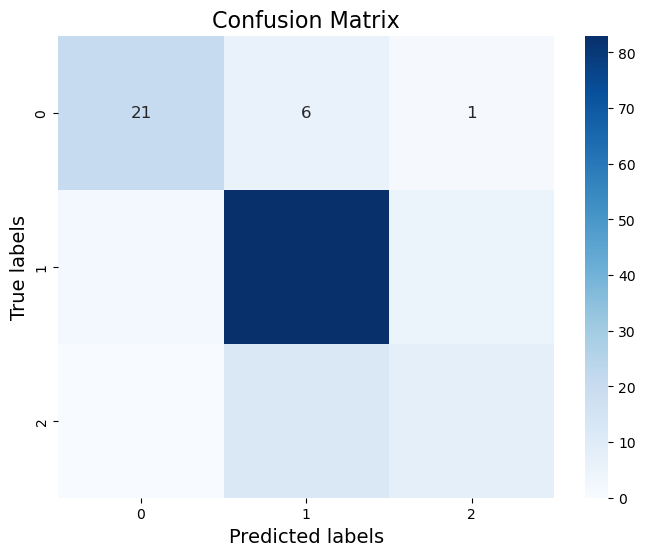

In [14]:
#random forest with only data from description
# One-hot encode categorical variable 'contact_type'
X = pd.get_dummies(df.drop(['priority', 'num_of_tickets_from_company_in_last_month', 'num_open_tickets', 'days_open', 'type', 'companies','channel'], axis=1))
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        28
           2       0.90      0.86      0.88        90
           3       0.68      0.75      0.71        20

    accuracy                           0.84       138
   macro avg       0.79      0.82      0.81       138
weighted avg       0.85      0.84      0.84       138



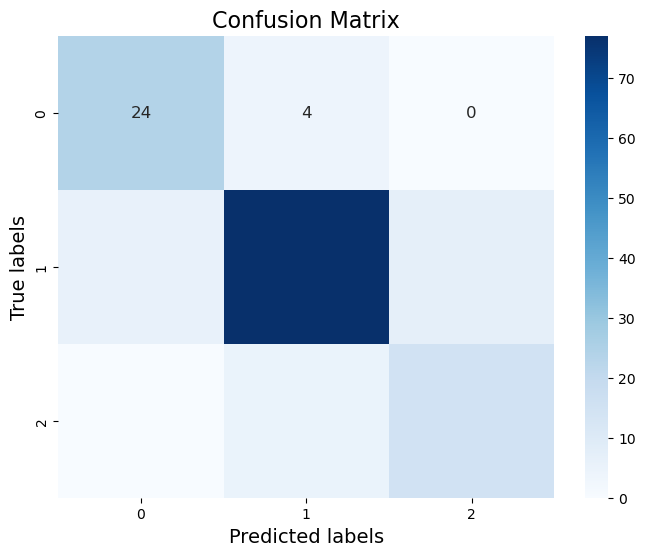

In [15]:
#random forest with only data from ticket
# One-hot encode categorical variable 'contact_type'
X = pd.get_dummies(df.drop(['priority', 'num_of_tickets_from_company_in_last_month', 'num_open_tickets', 'days_open'], axis=1))
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.86      0.84        28
           2       0.91      0.90      0.91        90
           3       0.80      0.80      0.80        20

    accuracy                           0.88       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.88      0.88      0.88       138



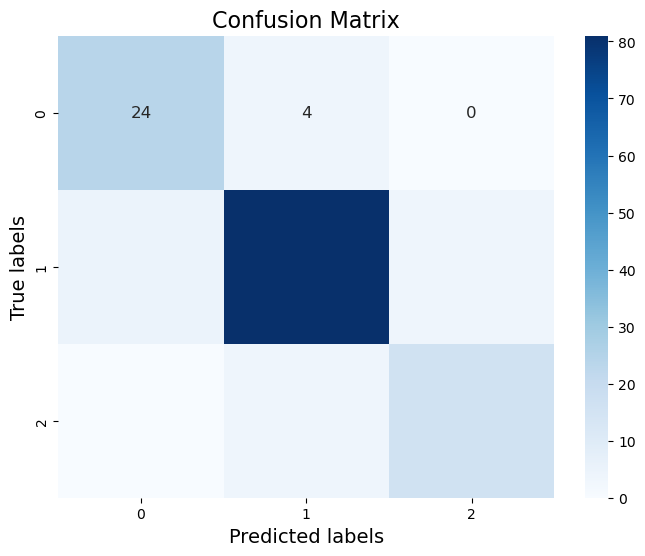

In [19]:
#random forest with with selected attributes
# One-hot encode categorical variable 'contact_type'
X = pd.get_dummies(df.drop(['priority', 'days_open'], axis=1))
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.86      0.87        28
           2       0.89      0.93      0.91        90
           3       0.82      0.70      0.76        20

    accuracy                           0.88       138
   macro avg       0.87      0.83      0.85       138
weighted avg       0.88      0.88      0.88       138



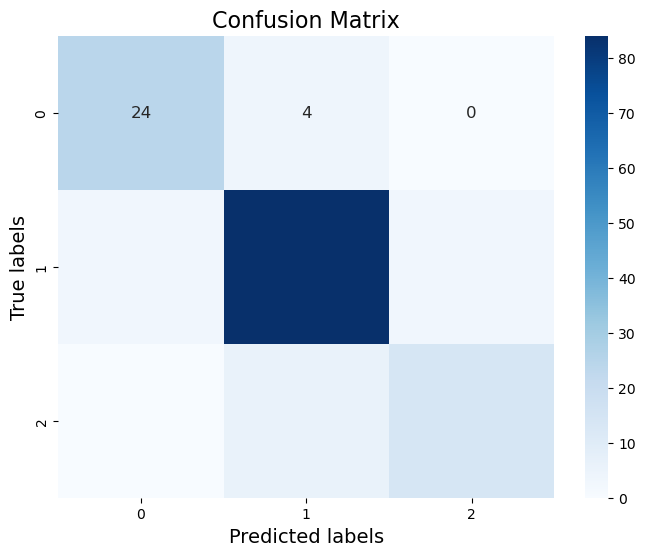

In [20]:
#random forest with only data from ticket
# One-hot encode categorical variable 'contact_type'
X = pd.get_dummies(df.drop(['priority', 'num_of_tickets_from_company_in_last_month'], axis=1))
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.86      0.81        28
           2       0.90      0.87      0.88        90
           3       0.75      0.75      0.75        20

    accuracy                           0.85       138
   macro avg       0.81      0.82      0.81       138
weighted avg       0.85      0.85      0.85       138



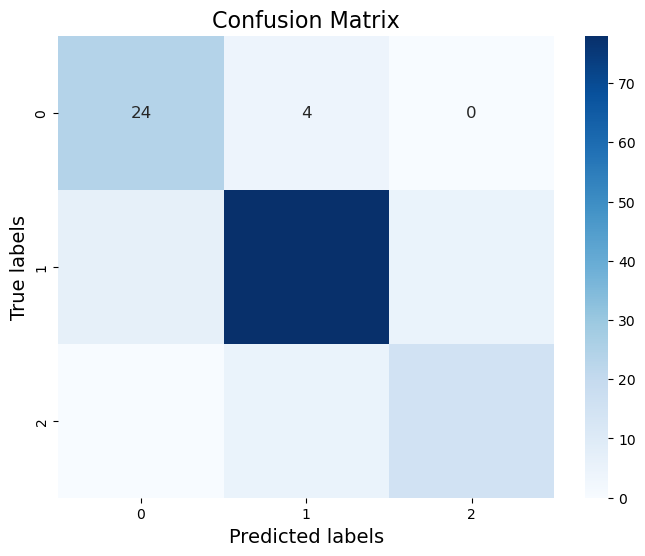

In [21]:
#random forest with only data from ticket
# One-hot encode categorical variable 'contact_type'
X = pd.get_dummies(df.drop(['priority',  'num_open_tickets'], axis=1))
y = df['priority']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()